### Get the dataset

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-19 17:58:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
raw.githubusercontent.com (raw.githubusercontent.com) çözümleniyor... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443 bağlanılıyor... bağlantı kuruldu.
HTTP isteği gönderildi, cevap bekleniyor... 200 OK
Uzunluk: 7077973 (6,8M) [text/plain]
Kayıt yeri: `AB_NYC_2019.csv'

AB_NYC_2019.csv     100%[===================>]   6,75M  1000KB/s    süre 6,8s  

2021-09-19 17:58:14 (1011 KB/s) - `AB_NYC_2019.csv' kaydedildi [7077973/7077973]



### EDA
- Load the data
- Look at `price` variable. Does it have a long tail?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark")

# load the data
data = pd.read_csv("AB_NYC_2019.csv")

# display 'price' variable
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [3]:
print("Max value of price", data.price.max())
print("Min value of price", data.price.min())
print("Mean value of price", data.price.mean())
print("Median value of price", data.price.median())

Max value of price 10000
Min value of price 0
Mean value of price 152.7206871868289
Median value of price 106.0


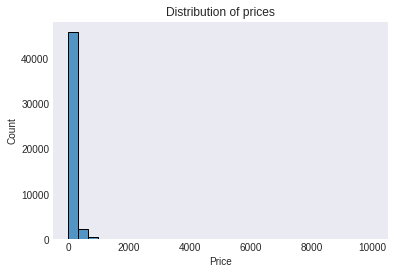

In [4]:
sns.color_palette("pastel")
sns.histplot(data.price, bins = 30)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of prices");

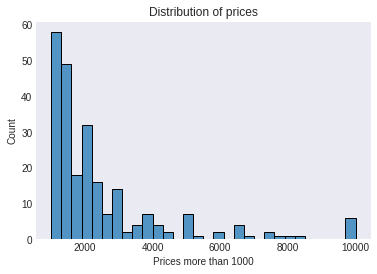

In [5]:
sns.histplot(data.price[data.price > 1000], bins = 30)
plt.xlabel("Prices more than 1000")
plt.ylabel("Count")
plt.title("Distribution of prices");

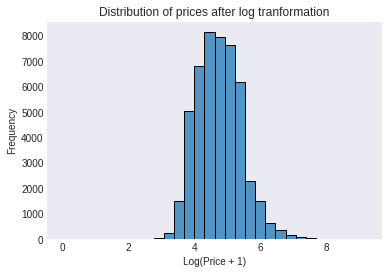

In [6]:
log_price = np.log1p(data.price)

sns.histplot(log_price, bins = 30)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation');

In [7]:
df = data[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", 
           "calculated_host_listings_count", "availability_365", "reviews_per_month"]]

### Question 1

**Number of missing values: 10.052**

In [8]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
reviews_per_month                 10052
dtype: int64

### Question 2

**Median (50% percentile) for variable 'minimum_nights': 3.0**

In [9]:
df.minimum_nights.quantile(.5)
# df.minimum_nights.median()

3.0

### **Split the data**
- Shuffle the initial dataset, use seed `42`
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value `price` is not in your dataframe.
- Apply the log transformation to the price variable using the `np.log1p()` function.

In [66]:
np.random.seed(42)

n = len(df)

n_val = int(.2 * n)
n_test = int(.2 * n)
n_train = n - (n_val + n_test)

# shuffle indexes
idx = np.arange(n)
np.random.shuffle(idx)

# shuffle data
df_shuffled = df.iloc[idx]

# create shuffled data with 60%/20%/20% distribution
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# take original prices as target values
y_train_or = df_train.price.values
y_val_or = df_val.price.values
y_test_or = df_test.price.values

# take target prices with log transformation
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

# delete target values in dataset
del df_train["price"]
del df_val["price"]
del df_test["price"]

### Question 3
- We need to deal with missing values for the column from Q1. `reviews_per_month`
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [67]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [68]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [69]:
# filling with mean
mean = df_train.reviews_per_month.mean()
X_train = df_train.fillna(mean)
w_0, w = train_linear_regression(X_train, y_train)

In [70]:
y_pred = w_0 + X_train.dot(w)

In [71]:
print("RMSE (mean)", rmse(y_train, y_pred))

RMSE (mean) 0.6429347474014242


Text(0.5, 1.0, 'Predictions vs actual distribution')

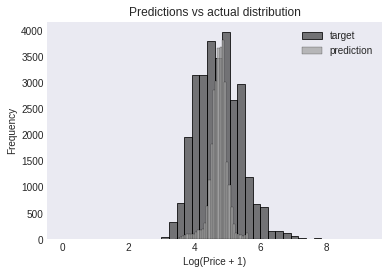

In [72]:
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [73]:
# filling with zeros
X_train = df_train.fillna(0)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

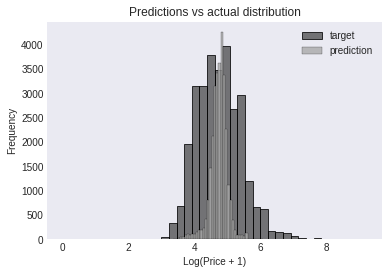

In [74]:
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [75]:
print("RMSE (zero)", rmse(y_train, y_pred))

RMSE (zero) 0.6428860484860427


### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [76]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [77]:
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)

In [78]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    scores = rmse(y_val, y_pred)
    print(r, round(w_0, 2), w[0], round(scores, 2))

0 -419.91 1.3067622504813254 0.64
1e-06 -419.86 1.306522654563991 0.64
0.0001 -414.98 1.2830813170254225 0.64
0.001 -375.27 1.092610335754387 0.64
0.01 -191.78 0.21237489055880754 0.66
0.1 -32.56 -0.5507404339957327 0.68
1 -3.5 -0.6826028435303779 0.68
5 -0.7 -0.6641702855277816 0.68
10 -0.35 -0.6297755921941148 0.68


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [79]:
scores = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = df_train.fillna(0)
    X_val = df_val.fillna(0)

    for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
        w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
        y_pred = w_0 + X_val.dot(w)
        score = rmse(y_val, y_pred)
        print("Seed: ", i)
        scores.append(score)
        print(r, round(w_0, 2), w[0], round(score, 2))
    std = np.std(scores)
    print(round(std, 3))

Seed:  0
0 -427.63 1.4163378003868696 0.65
Seed:  0
1e-06 -427.58 1.416089727438086 0.65
Seed:  0
0.0001 -422.53 1.3918229815399585 0.65
Seed:  0
0.001 -381.59 1.1949459297161324 0.66
Seed:  0
0.01 -193.79 0.2920044655265788 0.67
Seed:  0
0.1 -32.73 -0.481806845828362 0.69
Seed:  0
1 -3.51 -0.6155053411293323 0.69
Seed:  0
5 -0.71 -0.6004907209493262 0.69
Seed:  0
10 -0.35 -0.5698394011499937 0.69
0.017
Seed:  1
0 -414.71 1.36604945721749 0.65
Seed:  1
1e-06 -414.66 1.3658166021114857 0.65
Seed:  1
0.0001 -409.88 1.3430324958361441 0.65
Seed:  1
0.001 -371.06 1.1576801807804245 0.65
Seed:  1
0.01 -190.57 0.29593877463686524 0.66
Seed:  1
0.1 -32.5 -0.4581635770181719 0.68
Seed:  1
1 -3.49 -0.5900709830291164 0.69
Seed:  1
5 -0.7 -0.5757776075321814 0.69
Seed:  1
10 -0.35 -0.5461370590209922 0.69
0.018
Seed:  2
0 -423.25 1.2581926916343753 0.65
Seed:  2
1e-06 -423.2 1.2579551957865758 0.65
Seed:  2
0.0001 -418.3 1.2347182848383151 0.65
Seed:  2
0.001 -378.42 1.0458263307164557 0.65
Seed

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [86]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

X_train = df_train.fillna(0)
X_test = df_test.fillna(0)
w_0, w = train_linear_regression_reg(X_train, y_train, r=.001)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

0.6454512122425065
